<a href="https://colab.research.google.com/github/ptrim22/Trauma-Capstone/blob/main/Trauma_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [164]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [165]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import linear_model, preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline 
from scipy import stats
# random enables us to generate random numbers
import random
df=pd.read_csv(r'drive/MyDrive/Data Science Bootcamp/CogEmoPaper_FinalData.csv')

In [166]:
df

,ID,Age,Gender,FamilyStatus,Education,CFS_Total,TOT_TRAUMA,DTS_TOT,Total_FREE,Total_PACT,PCL_Total
0,3,27.0,0,1,15,58,4,39,14.0,10.250000,46.117647
1,4,38.0,1,2,16,58,2,40,20.5,10.250000,25.411765
2,6,29.0,1,1,16,51,4,33,14.0,8.330000,21.647059
3,7,24.0,1,1,16,58,1,0,14.5,8.330000,16.800000
4,8,25.0,1,1,17,58,1,56,13.5,6.000000,34.823529
...,...,...,...,...,...,...,...,...,...,...,...
104,156,25.0,0,1,14,56,5,30,15.0,9.750000,20.000000
105,157,23.0,1,2,14,37,2,76,18.0,6.000000,31.200000
106,160,21.0,1,1,12,62,2,61,16.5,10.000000,39.200000
107,161,29.0,0,1,16,61,1,11,14.0,8.833333,17.600000


In [167]:
df.describe()

,ID,Age,Gender,FamilyStatus,Education,CFS_Total,TOT_TRAUMA,DTS_TOT,Total_FREE,Total_PACT,PCL_Total
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,79.339450,25.225688,0.788991,1.302752,14.431193,56.293578,2.366972,40.889908,15.270642,9.158961,29.232596
std,45.915426,4.624420,0.409910,0.461571,2.157532,7.217908,1.613947,26.557882,2.839480,2.132077,11.339982
min,3.000000,19.000000,0.000000,1.000000,12.000000,37.000000,1.000000,0.000000,7.000000,2.666700,16.000000
25%,40.000000,22.000000,1.000000,1.000000,13.000000,52.000000,1.000000,20.000000,13.500000,7.830000,19.764706
50%,77.000000,24.000000,1.000000,1.000000,13.000000,57.000000,2.000000,39.000000,15.500000,9.160000,27.294118
75%,115.000000,27.000000,1.000000,2.000000,16.000000,61.000000,3.000000,57.000000,17.000000,10.500000,34.823529
max,163.000000,39.000000,1.000000,2.000000,20.000000,72.000000,7.000000,120.000000,24.000000,14.000000,68.705882


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd806e9ab90>,
      dtype=object)

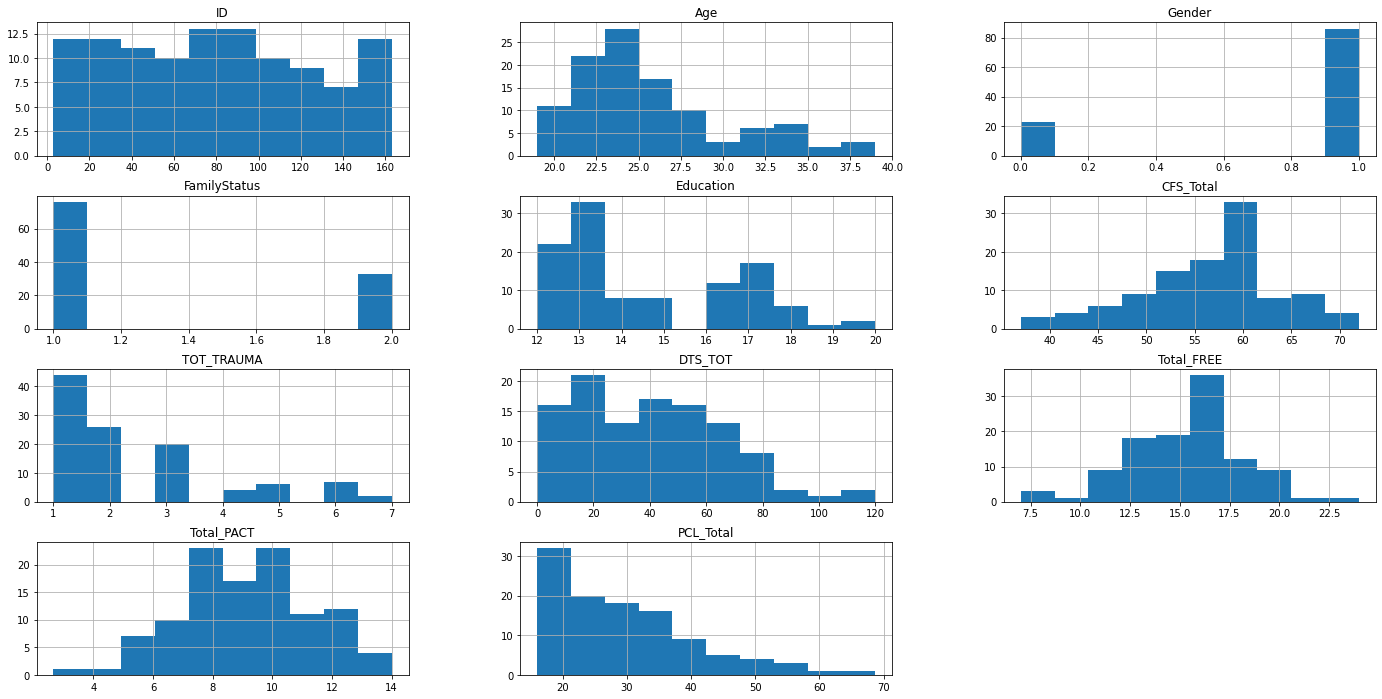

In [168]:
df.hist(figsize=(24,12))

In [169]:
df.isnull()


,ID,Age,Gender,FamilyStatus,Education,CFS_Total,TOT_TRAUMA,DTS_TOT,Total_FREE,Total_PACT,PCL_Total
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
104,False,False,False,False,False,False,False,False,False,False,False
105,False,False,False,False,False,False,False,False,False,False,False
106,False,False,False,False,False,False,False,False,False,False,False
107,False,False,False,False,False,False,False,False,False,False,False


In [170]:
df.isnull().sum()


ID              0
Age             0
Gender          0
FamilyStatus    0
Education       0
CFS_Total       0
TOT_TRAUMA      0
DTS_TOT         0
Total_FREE      0
Total_PACT      0
PCL_Total       0
dtype: int64

In [171]:
df.corr()

,ID,Age,Gender,FamilyStatus,Education,CFS_Total,TOT_TRAUMA,DTS_TOT,Total_FREE,Total_PACT,PCL_Total
ID,1.000000,-0.037186,-0.100947,-0.063438,-0.336479,-0.085572,-0.024312,-0.125659,-0.112709,-0.080492,-0.121368
Age,-0.037186,1.000000,-0.270653,0.436187,0.623443,0.159444,0.134446,-0.239452,0.277928,-0.003655,-0.211873
Gender,-0.100947,-0.270653,1.000000,-0.001796,-0.011334,-0.194805,-0.091808,0.156897,-0.097652,-0.172698,0.093779
FamilyStatus,-0.063438,0.436187,-0.001796,1.000000,0.406971,0.145387,-0.100803,-0.313745,0.180638,0.100427,-0.238531
Education,-0.336479,0.623443,-0.011334,0.406971,1.000000,0.073253,-0.040545,-0.053298,0.139472,0.015439,-0.067783
CFS_Total,-0.085572,0.159444,-0.194805,0.145387,0.073253,1.000000,-0.169890,-0.319884,0.279805,0.321059,-0.420538
TOT_TRAUMA,-0.024312,0.134446,-0.091808,-0.100803,-0.040545,-0.169890,1.000000,0.258663,0.041771,-0.149167,0.232702
DTS_TOT,-0.125659,-0.239452,0.156897,-0.313745,-0.053298,-0.319884,0.258663,1.000000,-0.296986,-0.331431,0.500627
Total_FREE,-0.112709,0.277928,-0.097652,0.180638,0.139472,0.279805,0.041771,-0.296986,1.000000,0.316544,-0.291194
Total_PACT,-0.080492,-0.003655,-0.172698,0.100427,0.015439,0.321059,-0.149167,-0.331431,0.316544,1.000000,-0.317508


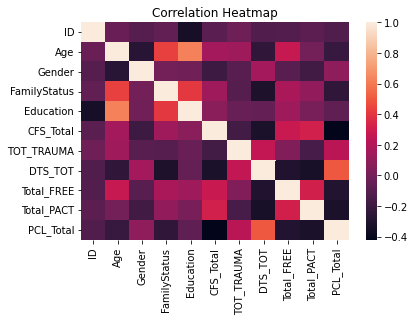

In [172]:
sns.heatmap(df.corr())
plt.title('Correlation Heatmap')
plt.savefig('trauma_heatmap.png',tight_layout=True)

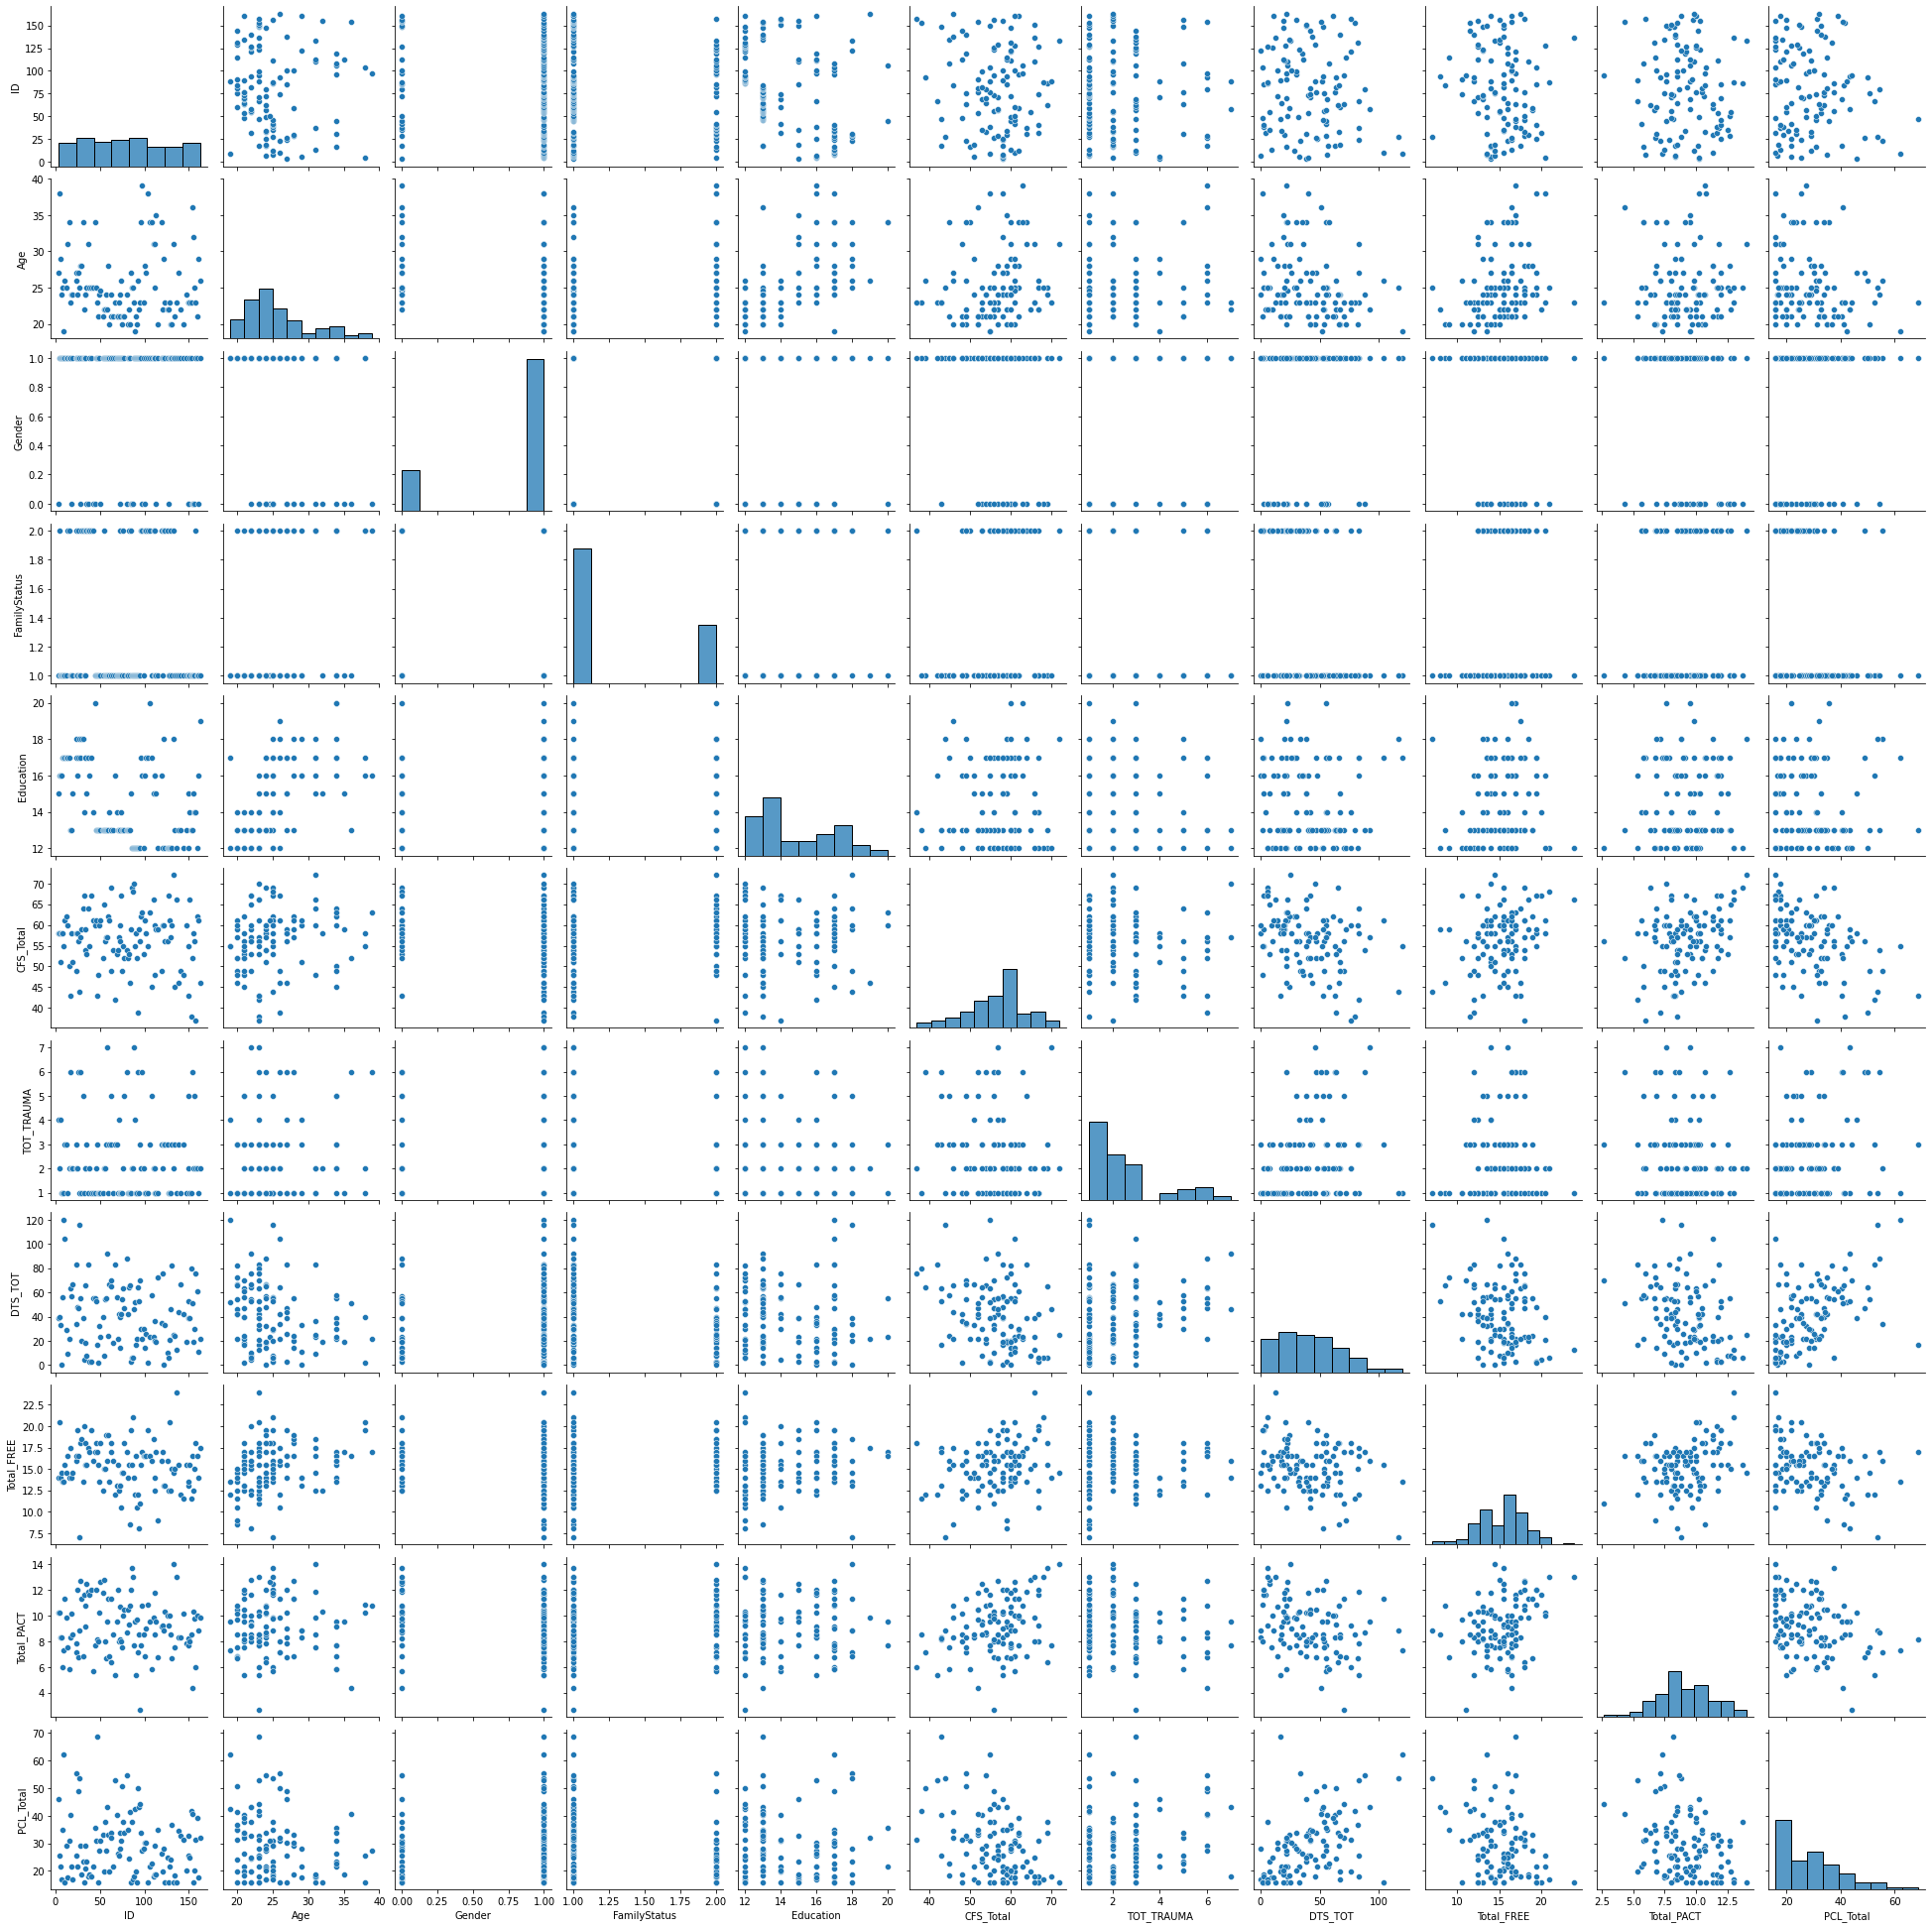

In [173]:
sns.pairplot(df)

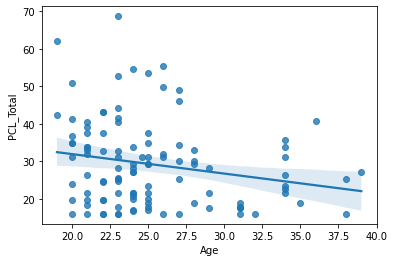

In [174]:
sns.regplot(x='Age',y='PCL_Total',data=df)

There appears (visually) to be a small effect of age on PCL_Total (current trauma symptoms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


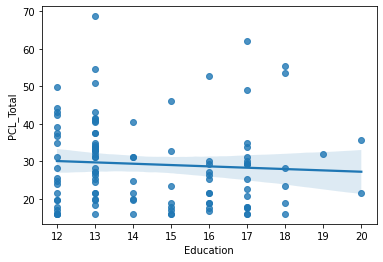

In [175]:
sns.regplot('Education',y='PCL_Total',data=df)

Education seems visually to have minimal impact on trauma score.

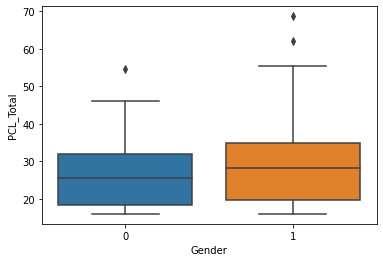

In [176]:
sns.boxplot(x='Gender',y='PCL_Total',data=df)
plt.savefig('Male vs Female Trauma Boxplots')

There appears visually to be a small difference in trauma distribution per gender. Unknown whether this is statistically significant or not at this point.

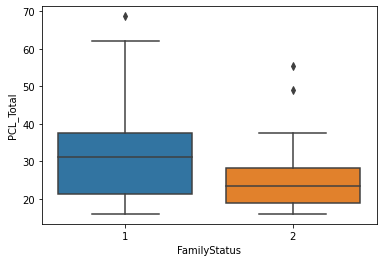

In [177]:
sns.boxplot(x='FamilyStatus',y='PCL_Total',data=df)
plt.savefig('Married vs Single Boxplots')

There appears visually to be a large difference in average trauma for single vs married people, with married people having lower average trauma scores.

In [178]:
df.value_counts(['Gender','FamilyStatus'])

Gender  FamilyStatus
1       1               60
        2               26
0       1               16
        2                7
dtype: int64

In [179]:
df.groupby(['Gender','FamilyStatus']).mean('Age')

ID        Age  ...  Total_PACT  PCL_Total
Gender FamilyStatus                        ...                       
0      1             97.625000  27.287500  ...    9.795414  28.785294
       2             66.857143  28.428571  ...   10.032857  23.529412
1      1             76.883333  23.000000  ...    8.811344  31.599216
       2             77.115385  28.230769  ...    9.334212  25.581900

[4 rows x 9 columns]

In the absence of a data dictionary, some educated guesses may be necessary to translate our variables into meaningful descriptions. Taking into account that our sample is approximately 80% gender '1', a higher average PCL_Total score (present trauma symptoms), it is supposed that gender 1 is female and gender 0 is male.  It is also supposed that family status 2 is married and 1 is single.


Let's try testing just the education data as a feature and split the data into training and testing partitions to conduct a linear regresssion.

In [180]:
X=df['Education'].values
y=df['PCL_Total'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [181]:
print(X_train,X_test,y_train,y_test)

[13 13 17 14 13 17 13 12 13 13 17 15 13 12 17 13 12 17 17 18 12 12 17 17
 13 13 18 15 15 16 18 13 12 17 14 13 18 13 13 12 14 12 12 14 14 14 13 13
 13 13 20 13 19 15 12 12 13 20 13 16 13 14 16 17 12 15 17 12 16 18 12 12
 17 13 14 13] [16 13 17 18 12 12 13 16 12 13 16 15 15 12 17 16 13 16 16 13 15 13 12 16
 17 13 13 17 16 13 12 12 17] [27.29411765 54.58823529 33.88235294 21.64705882 32.94117647 62.11764706
 37.64705882 17.88235294 43.29411765 32.94117647 48.94117647 16.
 31.05882353 43.29411765 29.17647059 32.         49.88235294 30.11764706
 17.88235294 18.82352941 21.6        16.         17.88235294 17.6
 41.6        28.23529412 55.52941176 17.88235294 23.52941176 16.8
 53.64705882 27.29411765 16.         16.         20.         32.8
 16.         33.88235294 33.88235294 25.6        40.47058824 19.76470588
 16.94117647 31.2        24.8        19.76470588 41.41176471 25.41176471
 34.4        24.47058824 21.64705882 16.         32.         16.
 42.35294118 39.2        37.64705882 35.76470

In [182]:
rEdModel=linear_model.LinearRegression()
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
y_train=y_train.reshape(-1,1)
results=rEdModel.fit(X_train,y_train)

In [183]:
rEdModel.score(X_train,y_train)

0.002237360392617127

This is a very low score (r^2). Education can effectively be dropped as a feature for modeling trauma score.

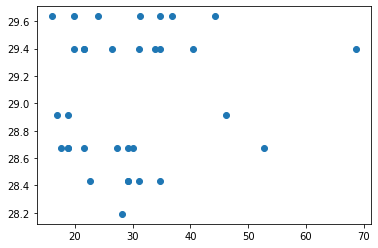

In [184]:
y_predict=rEdModel.predict(X_test)
plt.scatter(y_test,y_predict)
plt.show()

Education, as appeared in the scatterplot against PCL_Total, would seem to add little to any explanatory or predictive model of trauma symptoms score, as can be seen from the low Rsquared value and the random nature of the predicted vs actual PCL_Total trauma scores. It will be dropped from further analysis.


In [185]:
X=df['Age'].values
y=df['PCL_Total'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rAgeModel=linear_model.LinearRegression()
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
y_train=y_train.reshape(-1,1)
rAgeModel.fit(X_train,y_train)
rAgeModel.score(X_train,y_train)

0.052637637205067866

Here we have explored using age alone as a feature/predictor of trauma score. Age seems to have a very weak effect on trauma score. It will be a judgment call whether to include it in a model.

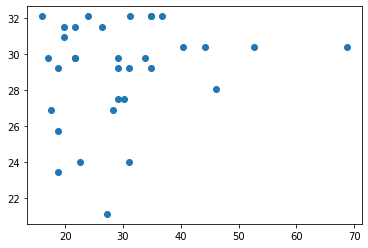

In [186]:
y_predict=rAgeModel.predict(X_test)
plt.scatter(y_test,y_predict)
plt.show()

Age explains about 5% of the varation in PCL_Total scores (present trauma symptoms). It may be factored into a future multivariate regression model but does not appear to be a major driver, and may have covariance with other explanatory variables as well.

The other "demographic" variables, gender and family status, are categorical rather than quantitative and lend themselves more logically to an equality of means test rather than a univariate regression model.

In [187]:
df.groupby('FamilyStatus').mean()

,ID,Age,Gender,Education,CFS_Total,TOT_TRAUMA,DTS_TOT,Total_FREE,Total_PACT,PCL_Total
FamilyStatus,,,,,,,,,,
1,81.250000,23.902632,0.789474,13.855263,55.605263,2.473684,46.355263,14.934211,9.018517,31.006811
2,74.939394,28.272727,0.787879,15.757576,57.878788,2.121212,28.303030,16.045455,9.482409,25.146524


Married subjects have about 6 points lower trauma score, on average, than single subjects.

In [188]:
df.groupby('Gender').mean('PCL_Total')

,ID,Age,FamilyStatus,Education,CFS_Total,TOT_TRAUMA,DTS_TOT,Total_FREE,Total_PACT,PCL_Total
Gender,,,,,,,,,,
0,88.260870,27.634783,1.304348,14.478261,59.000000,2.652174,32.869565,15.804348,9.867680,27.185678
1,76.953488,24.581395,1.302326,14.418605,55.569767,2.290698,43.034884,15.127907,8.969421,29.780027


Male subjects have about 2.5 point lower trauma score, on average, than female.

In [189]:
married=df['PCL_Total'][df['FamilyStatus']==2]
single=df['PCL_Total'][df['FamilyStatus']==1]
print(married, single)

1      25.411765
8      17.600000
9      31.058824
13     55.529412
16     48.941176
19     18.823529
20     23.529412
23     20.705882
24     23.529412
25     17.882353
26     18.823529
27     17.882353
28     21.647059
36     19.764706
49     28.235294
53     37.647059
57     24.470588
59     16.000000
69     33.882353
70     27.294118
72     30.117647
73     30.117647
74     16.000000
75     21.647059
77     17.882353
79     18.823529
82     26.352941
84     28.235294
85     16.000000
86     24.800000
89     24.000000
91     16.000000
105    31.200000
Name: PCL_Total, dtype: float64 0      46.117647
2      21.647059
3      16.800000
4      34.823529
5      62.117647
         ...    
103    16.000000
104    20.000000
106    39.200000
107    17.600000
108    32.000000
Name: PCL_Total, Length: 76, dtype: float64


In [190]:
marriednormal=stats.normaltest(married)
singlenormal=stats.normaltest(single)
print(marriednormal,singlenormal)

NormaltestResult(statistic=20.53955773078347, pvalue=3.4665040217596635e-05) NormaltestResult(statistic=8.818813907019809, pvalue=0.012162389053695858)


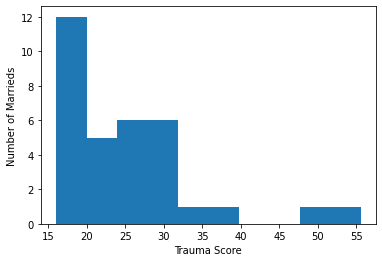

In [191]:
plt.hist(married)
plt.xlabel('Trauma Score')
plt.ylabel('Number of Marrieds')
plt.show()

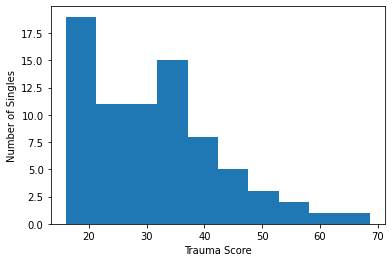

In [192]:
plt.hist(single)
plt.xlabel('Trauma Score')
plt.ylabel('Number of Singles')
plt.show()

In [193]:
#Let's see what a permutation of the trauma scores looks like when we group by marriage status...
df['Permutation1']=np.random.permutation(df['PCL_Total'])

# Call the describe() method on our permutation grouped by 'platform'. 
df.groupby('FamilyStatus')['Permutation1'].describe()

,count,mean,std,min,25%,50%,75%,max
FamilyStatus,,,,,,,,
1,76.0,28.232817,11.031760,16.0,19.764706,26.823529,33.176471,68.705882
2,33.0,31.535116,11.871555,16.0,21.647059,31.058824,40.470588,55.529412


This led to an average trauma score difference of 1 between singles and marrieds, much smaller than our observed actual difference of 6 points. This suggests pursuing creating many replicate samples, permuting the trauma scores, and observing the group mean differences among all the samples.

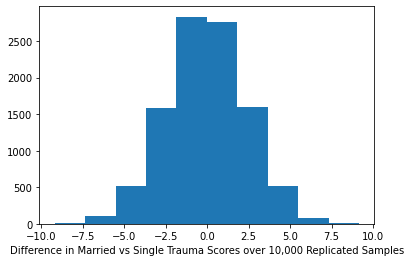

In [194]:
diff=np.empty(10000)
dfperm=df
for i in range(10000):
    dfperm['PermutedPCL']=np.random.permutation(df['PCL_Total'])
    marriedmean=dfperm.loc[dfperm['FamilyStatus']==2,'PermutedPCL'].mean()
    singlemean=dfperm.loc[dfperm['FamilyStatus']==1,'PermutedPCL'].mean()
    diff[i]=singlemean-marriedmean
histo=plt.hist(diff)
plt.xlabel('Difference in Married vs Single Trauma Scores over 10,000 Replicated Samples')
plt.savefig('Single vs Married Permutation Test')

In [195]:
obs_difference=df.loc[df['FamilyStatus']==1,'PCL_Total'].mean()-df.loc[df['FamilyStatus']==2,'PCL_Total'].mean()

# Make this difference absolute with the built-in abs() function. 
obs_difference=np.abs(obs_difference)

# Print out this value
print(obs_difference)

5.8602870817583685


In [196]:
p_value=np.sum(np.abs(diff)>=obs_difference)/len(diff)
print(p_value)

0.0122


P-value of .01 indicates that we would only get a group mean difference at least as extreme as the one we did get in only approximately 1% of similar samples. Thus we can be reasonably confident that the lower trauma score among married subjects (versus single counterparts) is statistically significant.

Let's try the same sort of simulation and analysis with respect to gender, to investigate whether our observed difference between males and females was likely to have occurred due to random sampling differences.

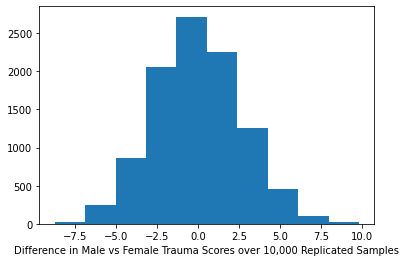

In [197]:
diff=np.empty(10000)
dfperm=df
for i in range(10000):
    dfperm['PermutedPCL']=np.random.permutation(df['PCL_Total'])
    malemean=dfperm.loc[dfperm['Gender']==0,'PermutedPCL'].mean()
    femalemean=dfperm.loc[dfperm['Gender']==1,'PermutedPCL'].mean()
    diff[i]=malemean-femalemean
histo=plt.hist(diff)
plt.xlabel('Difference in Male vs Female Trauma Scores over 10,000 Replicated Samples')
plt.savefig('Male vs Female Permutation Test')

In [198]:
obs_difference=df.loc[df['Gender']==1,'PCL_Total'].mean()-df.loc[df['Gender']==0,'PCL_Total'].mean()

# Make this difference absolute with the built-in abs() function. 
obs_difference=np.abs(obs_difference)

# Print out this value
print(obs_difference)

2.594349610955504


In [199]:
p_value=np.sum(np.abs(diff)>=obs_difference)/len(diff)
print(p_value)

0.3337


The p-value here of .33 indicates that while we did observe a trauma score difference between males and females, the size of the difference could easily occur simply due to random chance among the subjects in the sample.

Hence Family (Marriage) status could be kept as an explanatory variable but gender can reasonably discarded from the model for the sake of simplicity and elegance.

In [200]:
df


,ID,Age,Gender,FamilyStatus,Education,CFS_Total,TOT_TRAUMA,DTS_TOT,Total_FREE,Total_PACT,PCL_Total,Permutation1,PermutedPCL
0,3,27.0,0,1,15,58,4,39,14.0,10.250000,46.117647,62.117647,35.764706
1,4,38.0,1,2,16,58,2,40,20.5,10.250000,25.411765,32.941176,19.764706
2,6,29.0,1,1,16,51,4,33,14.0,8.330000,21.647059,46.117647,17.882353
3,7,24.0,1,1,16,58,1,0,14.5,8.330000,16.800000,16.000000,18.823529
4,8,25.0,1,1,17,58,1,56,13.5,6.000000,34.823529,68.705882,31.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,156,25.0,0,1,14,56,5,30,15.0,9.750000,20.000000,25.411765,19.764706
105,157,23.0,1,2,14,37,2,76,18.0,6.000000,31.200000,36.800000,31.200000
106,160,21.0,1,1,12,62,2,61,16.5,10.000000,39.200000,19.764706,32.000000
107,161,29.0,0,1,16,61,1,11,14.0,8.833333,17.600000,32.941176,31.058824


Let's clean up the data a bit by dropping columns we no longer wish to include in the model and giving the features and label column more intuitive names.

In [201]:
df=df.rename(columns={'FamilyStatus':'Married','CFS_Total':'Cog_Flex','Total_FREE':'Flex_Emot_Express','Total_PACT':'Flex_Coping','PCL_Total':'PTSD_Symptoms'})


In [202]:
dfmodel=df.drop(['ID','Gender','Education','TOT_TRAUMA','DTS_TOT','Permutation1','PermutedPCL'],axis=1)


In [203]:
dfmodel

,Age,Married,Cog_Flex,Flex_Emot_Express,Flex_Coping,PTSD_Symptoms
0,27.0,1,58,14.0,10.250000,46.117647
1,38.0,2,58,20.5,10.250000,25.411765
2,29.0,1,51,14.0,8.330000,21.647059
3,24.0,1,58,14.5,8.330000,16.800000
4,25.0,1,58,13.5,6.000000,34.823529
...,...,...,...,...,...,...
104,25.0,1,56,15.0,9.750000,20.000000
105,23.0,2,37,18.0,6.000000,31.200000
106,21.0,1,62,16.5,10.000000,39.200000
107,29.0,1,61,14.0,8.833333,17.600000


Let's now convert Married feature into a true Boolean by making 1's 0's and 2's 1's.

In [204]:
dfmodel.loc[dfmodel['Married']==1,'Married']=0
dfmodel.loc[dfmodel['Married']==2,'Married']=1
dfmodel

,Age,Married,Cog_Flex,Flex_Emot_Express,Flex_Coping,PTSD_Symptoms
0,27.0,0,58,14.0,10.250000,46.117647
1,38.0,1,58,20.5,10.250000,25.411765
2,29.0,0,51,14.0,8.330000,21.647059
3,24.0,0,58,14.5,8.330000,16.800000
4,25.0,0,58,13.5,6.000000,34.823529
...,...,...,...,...,...,...
104,25.0,0,56,15.0,9.750000,20.000000
105,23.0,1,37,18.0,6.000000,31.200000
106,21.0,0,62,16.5,10.000000,39.200000
107,29.0,0,61,14.0,8.833333,17.600000


Let's create a clean X matrix with our features to keep and a y vector of the current trauma score.

In [205]:
y=dfmodel['PTSD_Symptoms']
X=dfmodel.drop(columns='PTSD_Symptoms',axis=1)

In [206]:
X

,Age,Married,Cog_Flex,Flex_Emot_Express,Flex_Coping
0,27.0,0,58,14.0,10.250000
1,38.0,1,58,20.5,10.250000
2,29.0,0,51,14.0,8.330000
3,24.0,0,58,14.5,8.330000
4,25.0,0,58,13.5,6.000000
...,...,...,...,...,...
104,25.0,0,56,15.0,9.750000
105,23.0,1,37,18.0,6.000000
106,21.0,0,62,16.5,10.000000
107,29.0,0,61,14.0,8.833333


In [207]:
y


0      46.117647
1      25.411765
2      21.647059
3      16.800000
4      34.823529
         ...    
104    20.000000
105    31.200000
106    39.200000
107    17.600000
108    32.000000
Name: PTSD_Symptoms, Length: 109, dtype: float64

Now let's split the data into training and testing datasets and fit a simple linear regression model to the training data, apply to test data and score. 

In [208]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.4,random_state=42)
linreg=LinearRegression()
linreg.fit(X_train,y_train)
train_score=linreg.score(X_train,y_train)
test_score=linreg.score(X_test,y_test)
y_pred=linreg.predict(X_test)
rootMSE=np.sqrt(mean_squared_error(y_test,y_pred))
print('Training r^2 = ' + str(train_score))
print('Testing r^2 = ' + str(test_score))
print('Root MSE = ' + str(rootMSE))


Training r^2 = 0.3748306917918973
Testing r^2 = 0.015189102132859844
Root MSE = 12.081509208826645


On first glance, the features do not seem to be doing a good job of modeling or predicting trauma score. There also appears to be overfitting to the training data, as reflected in the large gap between training and testing score. 

In [209]:
lincv=cross_val_score(linreg,X,y,cv=5)
print(lincv)
meancvscore=np.mean(lincv)
print('Average r^2 for cross validation folds is {}'.format(meancvscore))

[ 0.17854205  0.07758338  0.18984929  0.30551285 -0.20805953]
Average r^2 for cross validation folds is 0.1086856069104084


Cross validating scoring seems to reflect the same poor predictive value of the features on trauma score.

Coefficients: 
 [ 0.00696214 -3.32990613 -0.48142731 -0.96034083 -0.27762885]
Mean squared error: 145.96
Coefficient of determination: 0.015


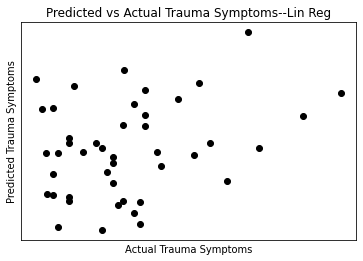

In [210]:
# The coefficients
print("Coefficients: \n", linreg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.3f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(y_test,y_pred, color="black")
plt.title('Predicted vs Actual Trauma Symptoms--Lin Reg')
plt.xlabel('Actual Trauma Symptoms')
plt.ylabel('Predicted Trauma Symptoms')

plt.xticks(())
plt.yticks(())
plt.savefig('Predicted vs Actual Trauma--LinReg')
plt.show()

Once more the sheer random scatter of predicted vs actual trauma scores underscores the inability to accurately model trauma score with the features at hand.

For the sake of thoroughness, let's try a scaled Lasso regression. First we'll search for a suitable hyperparameter alpha using cross validation...

In [211]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
parameters = {'alpha' : np.linspace(0,10,100)}
lasso=Lasso()
lasso_cv = GridSearchCV(lasso, param_grid=parameters)
lasso_cv.fit(X_train_scaled, y_train)
X_test_scaled=scaler.transform(X_test)
lasso_cv.predict(X_test_scaled)
print(lasso_cv.best_score_)
print(lasso_cv.best_params_)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.895e+03, tolerance: 5.484e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

0.2433790853098594
{'alpha': 0.6060606060606061}


Now let's try the cross validation hyperparameter search one more time, but drilling down to the area closer to the previously identified alpha of .606

In [212]:
parameters = {'alpha' : np.linspace(0,1,100)}
lasso=Lasso()
lasso_cv = GridSearchCV(lasso, param_grid=parameters)
lasso_cv.fit(X_train_scaled, y_train)
X_test_scaled=scaler.transform(X_test)
lasso_cv.predict(X_test_scaled)
print(lasso_cv.best_score_)
print(lasso_cv.best_params_)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.895e+03, tolerance: 5.484e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

0.24344438514677208
{'alpha': 0.6161616161616162}


Now let's run the lasso regression with our selected alpha hyperparameter of .616

0.3670993935315001
0.005612476064723926
[-0.         -1.11103084 -3.41265704 -2.66699822 -0.2730538 ]


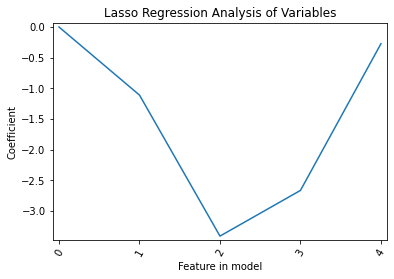

In [213]:
lasso_alpha=Lasso(alpha=.616)
lasso_alpha.fit(X_train_scaled, y_train)
y_pred=lasso_alpha.predict(X_test_scaled)
print(lasso_alpha.score(X_train_scaled,y_train))
print(lasso_alpha.score(X_test_scaled,y_test))

lasso_coef = lasso_alpha.coef_
print(lasso_coef)
X_train_scaled=pd.DataFrame(X_train_scaled)
y_train_scaled=pd.DataFrame(X_test_scaled)
# Plot the coefficients
plt.plot(range(len(X_train_scaled.columns)), lasso_coef)
plt.xticks(range(len(X_train_scaled.columns)), X_train_scaled.columns.values, rotation=60)
plt.title('Lasso Regression Analysis of Variables')
plt.xlabel('Feature in model')
plt.ylabel('Coefficient')
plt.savefig('Lasso Feature Analysis')
plt.margins(0.02)
plt.show()

The headline here is that while the lasso regression does distinguish between the usefulness of the features (cognitive flexibility and flexibility of emotional expression are the features with the largest contributions to predictive value), overall the model is not successful in predicting trauma score (training r^2=.37 testing r^2=.006)

Now let's conduct a Ridge regression (similar to Lasso). Again, first we will search for an appropriate alpha (hyperparameter) using cross validation. 

In [214]:
parameters = {'alpha' : np.linspace(0,100,100)}
ridge=Ridge()
ridge_cv = GridSearchCV(ridge, param_grid=parameters)
ridge_cv.fit(X_train_scaled, y_train)
ridge_cv.predict(X_test_scaled)
print(ridge_cv.best_score_)
print(ridge_cv.best_params_)

0.2408790009682627
{'alpha': 23.232323232323235}


In [215]:
parameters = {'alpha' : np.linspace(20,30,100)}
ridge=Ridge()
ridge_cv = GridSearchCV(ridge, param_grid=parameters)
ridge_cv.fit(X_train_scaled, y_train)
ridge_cv.predict(X_test_scaled)
print(ridge_cv.best_score_)
print(ridge_cv.best_params_)

0.2408795738793305
{'alpha': 23.434343434343432}


Now that we've identified an appropriate hyperparameter, we can run the Ridge regression and evaluate the model.

0.3607352970439808
0.03875370593143579
[-0.37075365 -1.17454395 -2.75820029 -2.31594352 -0.94834144]


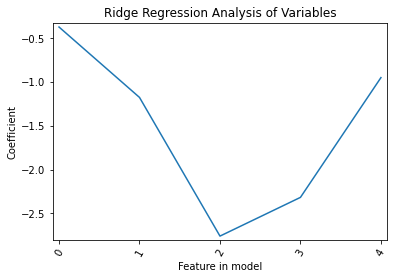

In [216]:
ridge_alpha=Ridge(alpha=23.43)
ridge_alpha.fit(X_train_scaled, y_train)
y_pred=ridge_alpha.predict(X_test_scaled)
print(ridge_alpha.score(X_train_scaled,y_train))
print(ridge_alpha.score(X_test_scaled,y_test))

ridge_coef = ridge_alpha.coef_
print(ridge_coef)
# Plot the coefficients
plt.plot(range(len(X_train_scaled.columns)), ridge_coef)
plt.xticks(range(len(X_train_scaled.columns)), X_train_scaled.columns.values, rotation=60)
plt.title('Ridge Regression Analysis of Variables')
plt.xlabel('Feature in model')
plt.ylabel('Coefficient')
plt.savefig('Ridge Feature Analysis')
plt.margins(0.02)
plt.show()

The results of the ridge regression are very similar to the results of the Lasso regression. Features cog_flex and emot_flex are the most influential, but overall the model is not successful at predicting or explaining trauma score, as reflected in the training and testing scoring. 

In conclusion, none of the regression approaches yield a good predictive or explanatory model of current trauma symptoms. It is yet possible that equipping indidividuals might contribute to a reduction in trauma symptoms, or be holistically beneficial in some other way (longer term improvement or sense of empowerment), but we don't have evidence in our data that we can lower trauma scores by increasing coping approaches like cognitive flexibility or flexibility of emotional expression. 

If a model must be selected, we will select the Ridge regression, since it takes into account collinearity and differently scaled variables better than linear regression, and has a slightly better testing score than the Lasso. It must be noted, however, that this is far from an endorsement of the model, since again the main takeaway from the process was that this data does not provide us with a powerful or accurate explanatory model.